In [1]:
from tensorflow.keras.models import load_model
new_model = load_model('/mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/main_program/model/Animal_Prediction/model (1).h5')

2025-06-14 18:41:48.151692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749901308.204659   10789 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749901308.220566   10789 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749901308.275921   10789 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749901308.275957   10789 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749901308.275959   10789 computation_placer.cc:177] computation placer alr

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


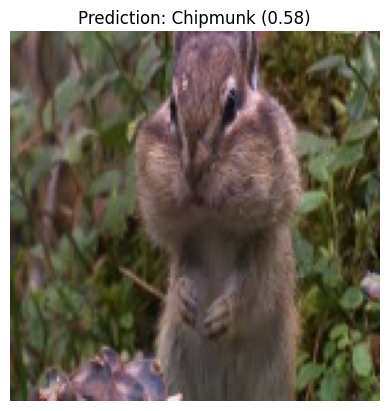

In [21]:
# testcnn.py
# Model test for 4 classes animal prediction
from sklearn.metrics import confusion_matrix
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

# --- Load Model yang Sudah Dilatih ---
model = tf.keras.models.load_model('/mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/main_program/model/Animal_Prediction/model.h5', compile=False)

# --- Classes name ---
class_names = ['Sheep', 'Cat', 'Butterfly', 'Chipmunk']

# --- Buka Dialog File Gambar ---
root = Tk()
root.withdraw()  # Sembunyikan jendela utama Tkinter
img_path = filedialog.askopenfilename(
    title="Animal pictures input",
    filetypes=[("Image files", "*.jpg *.jpeg *.png")]
)

# --- Prediksi Jika Gambar Dipilih ---
if img_path:
    # Load and preprocess the image
    img = cv2.imread(img_path)  # Read the image from the file path
    img = cv2.resize(img, (150, 150))  # Resize image to match model's expected sizing
    img_array = img.reshape(1, 150, 150, 3)  # Reshape the image for the model
    img_array = img_array / 255.0  # Normalize the image

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Tampilkan hasil
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f})")
    plt.axis("off")
    plt.show()
else:
    print("Tidak ada gambar yang dipilih.")
